<a href="https://colab.research.google.com/github/akilchen/side-project/blob/Python/Bank_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

下載、載入資料集

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                            Student Depression Dataset                              467020  2025-03-13 03:12:30.423000          19340        312  1.0              
abduulwasay/auto-prices-and-economic-trends-20192023              Auto Prices & Economic Trends (2019–2023)                 1018  2025-04-10 04:54:45.817000           1048         23  1.0              
jayaantanaath/student-habits-vs-academic-performance              Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000           2048         38  1.0     

In [8]:
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other


In [9]:
!unzip bank-customer-churn-dataset.zip

Archive:  bank-customer-churn-dataset.zip
  inflating: Bank Customer Churn Prediction.csv  


In [10]:
import pandas as pd
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# 看一下基本結構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# 看是否有缺值
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


A.流失比例

In [14]:
df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


### B.交叉分析

(1)性別X流失率

In [15]:
print(pd.crosstab(df['gender'], df['churn']))
print(pd.crosstab(df['gender'], df['churn'], normalize='index'))

churn      0     1
gender            
Female  3404  1139
Male    4559   898
churn          0         1
gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559


這個結果代表不論男性和女性，留住率皆高於流失率，但只看流失率的話，女性的流失率看似高於男性。但是否顯著還是要做假設檢定(卡方檢定)，不能貿然判定。

(2)國家X流失

In [16]:
print(pd.crosstab(df['country'], df['churn']))
print(pd.crosstab(df['country'], df['churn'], normalize='index'))

churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413
churn           0         1
country                    
France   0.838452  0.161548
Germany  0.675568  0.324432
Spain    0.833266  0.166734


(3)產品數量X流失

In [17]:
print(pd.crosstab(df['products_number'], df['churn']))
print(pd.crosstab(df['products_number'], df['churn'], normalize='index'))

churn               0     1
products_number            
1                3675  1409
2                4242   348
3                  46   220
4                   0    60
churn                   0         1
products_number                    
1                0.722856  0.277144
2                0.924183  0.075817
3                0.172932  0.827068
4                0.000000  1.000000


(4)有無信用卡X流失

In [18]:
print(pd.crosstab(df['credit_card'], df['churn']))
print(pd.crosstab(df['credit_card'], df['churn'], normalize='index'))

churn           0     1
credit_card            
0            2332   613
1            5631  1424
churn               0         1
credit_card                    
0            0.791851  0.208149
1            0.798157  0.201843


(4)活躍客戶X流失

In [19]:
print(pd.crosstab(df['active_member'], df['churn']))
print(pd.crosstab(df['active_member'], df['churn'], normalize='index'))

churn             0     1
active_member            
0              3547  1302
1              4416   735
churn                 0         1
active_member                    
0              0.731491  0.268509
1              0.857309  0.142691


### C. 數值變數與流失的平均趨勢圖

1.年資&流失

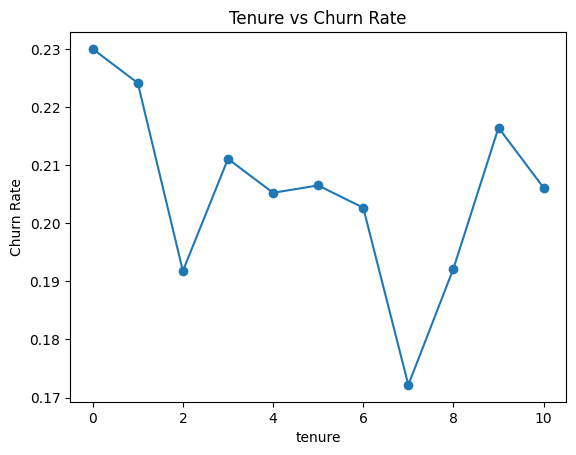

In [20]:
import matplotlib.pyplot as plt

df.groupby('tenure')['churn'].mean().plot(kind='line', marker='o')
plt.title('Tenure vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

2.credit_score(信用分數)&churn(流失)

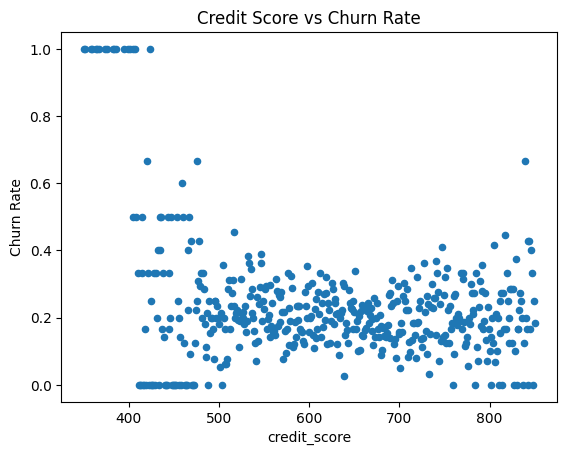

In [21]:
# 計算各credit_score對應的平均流失率，且把他做成DataFrame
credit_churn_df = df.groupby('credit_score')['churn'].mean().reset_index() #.reset_index():把群組後的Series變成DataFrame

# 畫出散佈圖
credit_churn_df.plot.scatter(x='credit_score', y='churn')
plt.title('Credit Score vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

<ipython-input-22-84774c92eb88>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


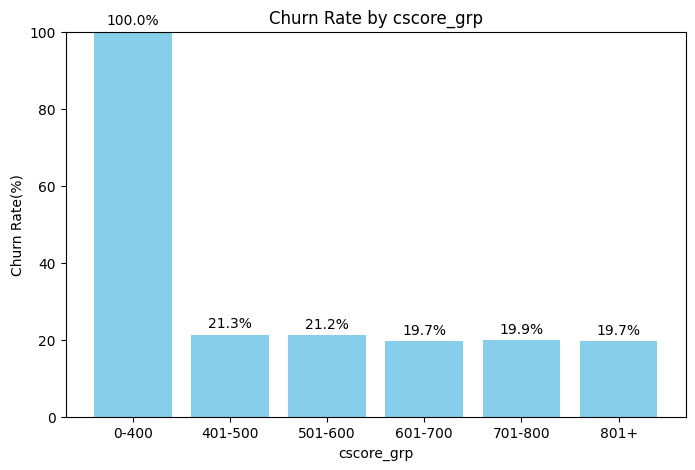

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 分數分箱
bins = [0, 400, 500, 600, 700, 800, 1000]
labels = ['0-400', '401-500', '501-600', '601-700', '701-800', '801+']
df['cscore_grp'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['cscore_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('cscore_grp')
plt.ylabel('Churn Rate(%)')
plt.title('Churn Rate by cscore_grp')
plt.ylim(0, 100)
plt.show()

3.age(年齡)&churn(流失)

In [24]:
import numpy as np

# 分箱
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60','61+']
df['age_grp'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['age_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['age_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn       0    1
age_grp           
0-20       84    5
21-30    1736  143
31-40    3913  538
41-50    1532  788
51-60     349  448
61+       349  115
churn            0          1
age_grp                      
0-20     94.382022   5.617978
21-30    92.389569   7.610431
31-40    87.912829  12.087171
41-50    66.034483  33.965517
51-60    43.789210  56.210790
61+      75.215517  24.784483


<ipython-input-25-4ccc8306de0f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


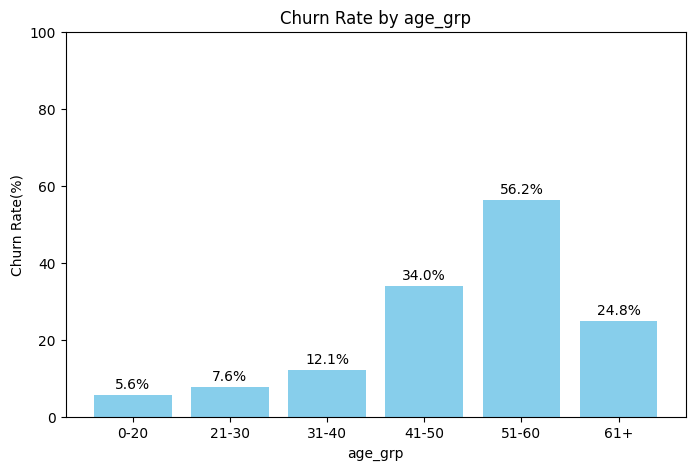

In [25]:
# 分數分箱
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60','61+']
df['age_grp'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('age_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['age_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('age_grp')
plt.ylabel('Churn Rate(%)')
plt.title('Churn Rate by age_grp')
plt.ylim(0, 100)
plt.show()

4.balance(帳戶餘額)&churn(流失)

<ipython-input-26-e1a2de1c64a4>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


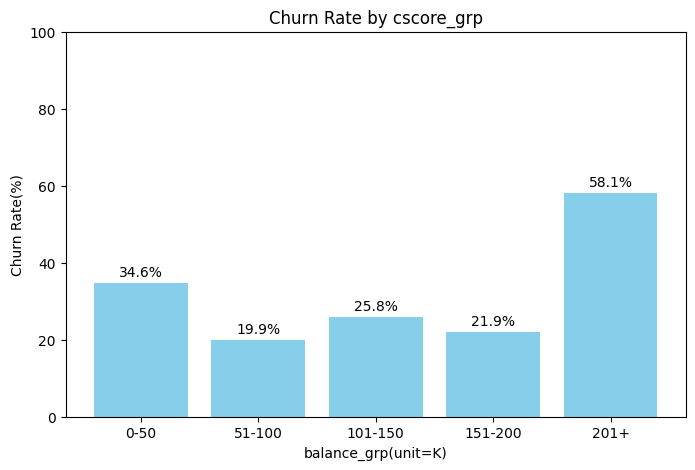

In [26]:
import numpy as np
# 分數分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50', '51-100', '101-150', '151-200', '201+']
df['balance_grp'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['balance_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('balance_grp(unit=K)')
plt.ylabel('Churn Rate(%)')
plt.title('Churn Rate by cscore_grp')
plt.ylim(0, 100)
plt.show()

201K以上占58.1%的流失率，感覺有異，做分組的交叉分析細看狀況

In [27]:
# 分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50K', '51-100K', '101-150K', '151-200K', '201+']
df['balancect_grp'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)

# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['balancect_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['balancect_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn             0    1
balancect_grp           
0-50K            51   27
51-100K        1258  313
101-150K       2827  983
151-200K        697  196
201+             13   18
churn                  0          1
balancect_grp                      
0-50K          65.384615  34.615385
51-100K        80.076384  19.923616
101-150K       74.199475  25.800525
151-200K       78.051512  21.948488
201+           41.935484  58.064516


比例比較高的原因在於201+人數比較少

5.estimated_salary(預估年薪)&churn(流失)

In [28]:
# 分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50K', '51-100K', '101-150K', '151-200K', '201+']
df['es_grp'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, right=True)

# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['es_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['es_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn        0    1
es_grp             
0-50K     2000  500
51-100K   2046  504
101-150K  2019  518
151-200K  1898  515
churn             0          1
es_grp                        
0-50K     80.000000  20.000000
51-100K   80.235294  19.764706
101-150K  79.582184  20.417816
151-200K  78.657273  21.342727


<ipython-input-29-50cf802e43a6>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('es_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


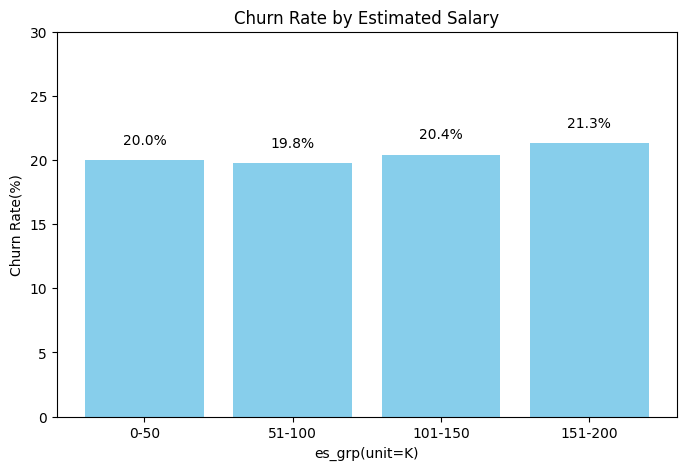

In [29]:
import numpy as np
# 分數分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50', '51-100', '101-150', '151-200', '201+']
df['es_grp'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('es_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['es_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('es_grp(unit=K)')
plt.ylabel('Churn Rate(%)')
plt.title('Churn Rate by Estimated Salary')
plt.ylim(0, 30)
plt.show()

## Step 5：建立分類模型（預測流失）

1.準備資料

In [33]:
features = ['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']
target = 'churn'

#X(自變數)和y(應變數)
x = df[features]
y = df[target]

2.處理類別變數（One-hot encoding）

In [34]:
# 對類別變數做 one-hot encoding
x = pd.get_dummies(x, columns=['country', 'gender'], drop_first=True)  # drop_first=True 是避免假共線

3.切分訓練及測試資料

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

4.建立 Logistic Regression 模型並訓練

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

4a.將資料做標準化後再建一次模

In [37]:
from sklearn.preprocessing import StandardScaler
#將資料標準化
scaler = StandardScaler()      #創造一個標準化工具（scaler）的實例，準備用來處理數據
x_scaled = scaler.fit_transform(x)  #標準化

#重新切分資料
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=50)

#再從新建一次模
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train)

LogisticRegression(max_iter=300)

5.預測與評估模型

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 預測
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# 準確率
print("Accuracy:", accuracy_score(y_test, y_pred))

# 混淆矩陣
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 更詳細的報告
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8125
Confusion Matrix:
[[1533   65]
 [ 310   92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1598
           1       0.59      0.23      0.33       402

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



6.迴歸係數、權重計算

In [39]:
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

             Feature  Coefficient
1                age     0.768569
6      active_member    -0.546792
8    country_Germany     0.334134
10       gender_Male    -0.255758
3            balance     0.175858
4    products_number    -0.080407
0       credit_score    -0.079691
2             tenure    -0.060631
7   estimated_salary     0.046140
9      country_Spain     0.042215
5        credit_card    -0.011308


7.畫出ROC曲線（Logistic Regression）

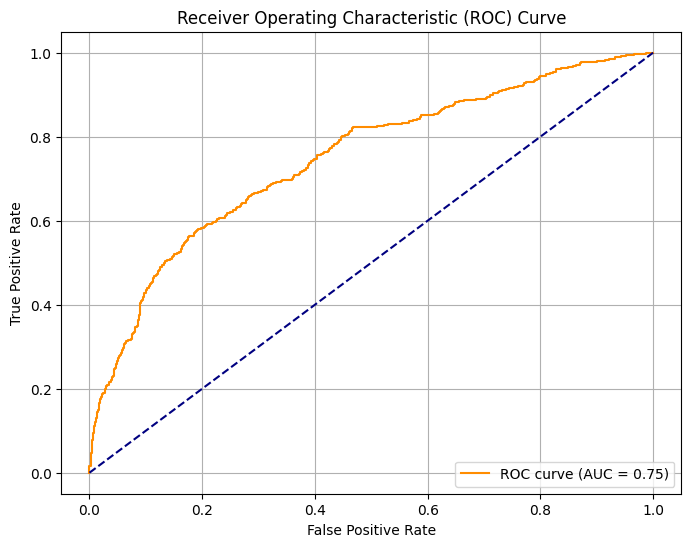

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#預測機率（而不是分類結果）
y_probs = model.predict_proba(x_test)[:, 1]  # 取出屬於「流失」的機率

#計算fpr和tpr
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

#畫圖
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

8.建立Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 建立模型（你可以調 max_depth 看樹多深）
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(x_train, y_train)

y_pred_dt = model.predict(x_test)
y_prob_dt = model.predict_proba(x_test)[:, 1]

# 準確率、AUC、混淆矩陣
print("Decision tree 準確率:", accuracy_score(y_test, y_pred_dt))
print("Decision tree AUC:", roc_auc_score(y_test, y_prob_dt))
print("Decision tree 混淆矩陣:\n", confusion_matrix(y_test, y_pred_dt))

Decision tree 準確率: 0.8125
Decision tree AUC: 0.7470874662980466
Decision tree 混淆矩陣:
 [[1533   65]
 [ 310   92]]


9.視覺化 Decision Tree

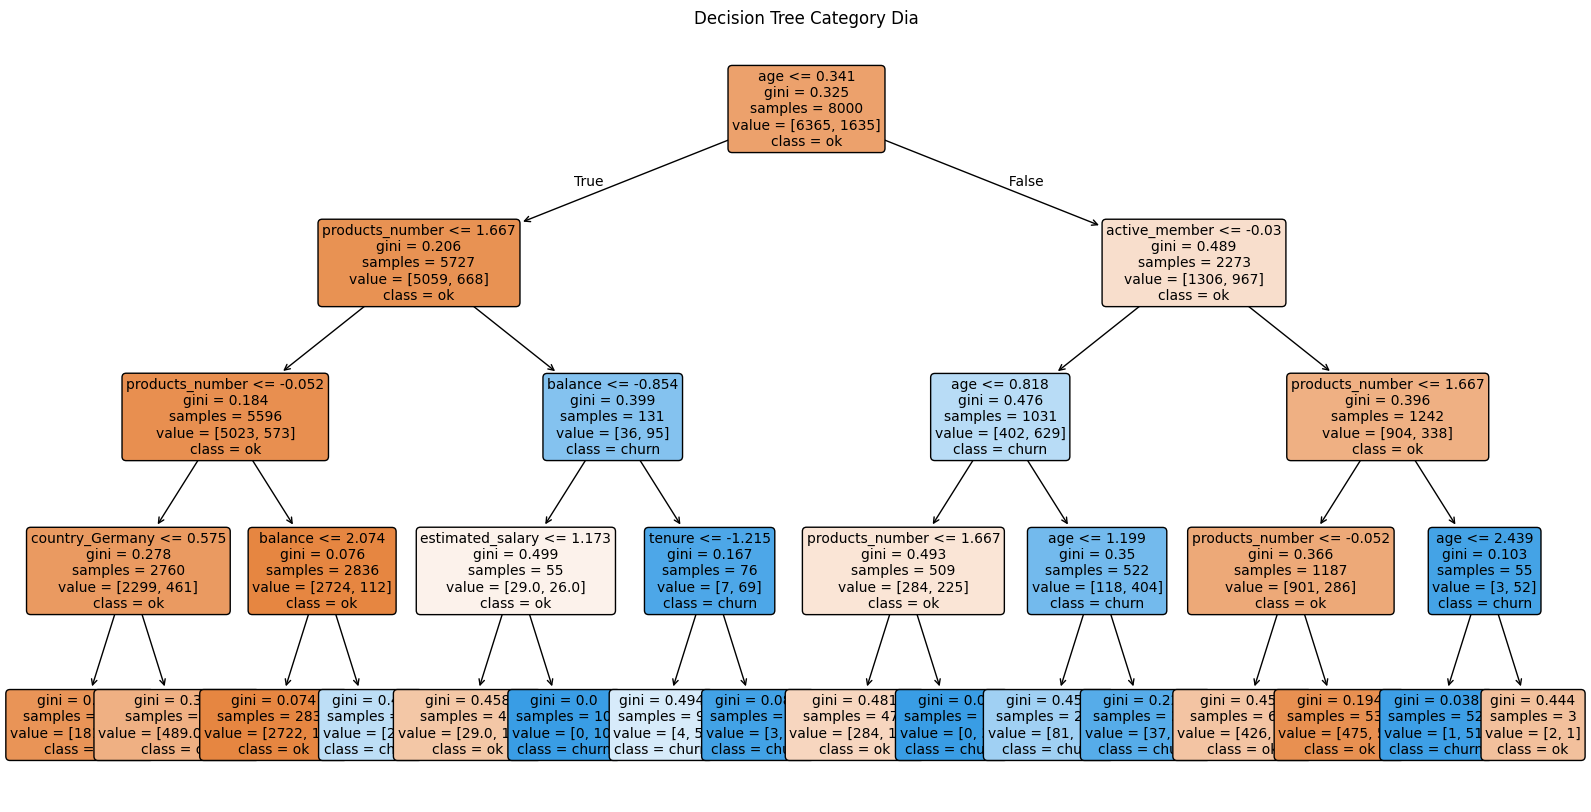

In [42]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=x.columns, class_names=["ok", "churn"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Category Dia")
plt.show()

10,建立隨機森林模型(Random Forest)

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

print("Random Forest 準確率:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))
print("Random Forest 混淆矩陣:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest 準確率: 0.859
Random Forest AUC: 0.8314458682806245
Random Forest 混淆矩陣:
 [[1533   65]
 [ 217  185]]


11.Naive Bayes(貝氏)

In [67]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)
y_prob_nb = nb_model.predict_proba(x_test)[:, 1]

print("Naive Bayes 準確率:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes AUC:", roc_auc_score(y_test, y_prob_nb))
print("Naive Bayes 混淆矩陣:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes 準確率: 0.831
Naive Bayes AUC: 0.7773242672743915
Naive Bayes 混淆矩陣:
 [[1510   88]
 [ 250  152]]


12. XGboost方法

In [55]:
!pip install xgboost

In [68]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
y_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

print("XGBoost 準確率:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))
print("XGBoost 混淆矩陣:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 準確率: 0.839
XGBoost AUC: 0.8297405338763008
XGBoost 混淆矩陣:
 [[1481  117]
 [ 205  197]]


14.ROC圖

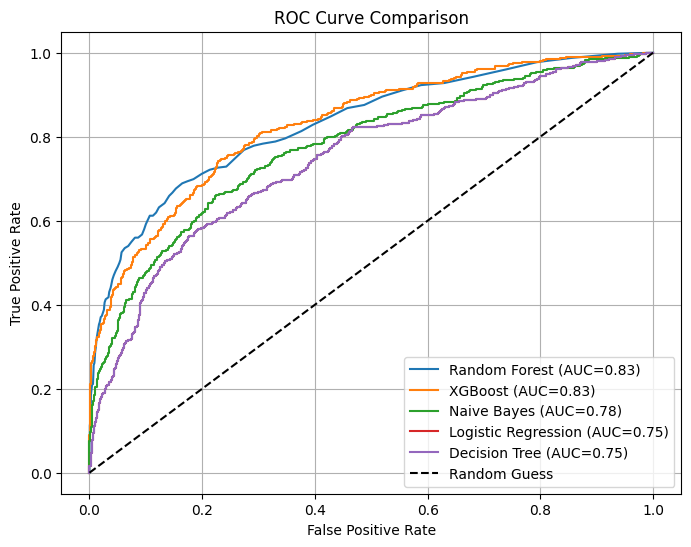

In [73]:
#各模型的AUC分數
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)           # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)           # Random Forest
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)           # Naive Bayes
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)        # XGBoost
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)           # Decision Tree

#畫ROC圖
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC=%.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC=%.2f)' % roc_auc_score(y_test, y_prob_xgb))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC=%.2f)' % roc_auc_score(y_test, y_prob_nb))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC=%.2f)' % roc_auc_score(y_test, y_prob))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC=%.2f)' % roc_auc_score(y_test, y_prob_dt))
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

#定義x軸,y軸
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

儲存pkl

In [77]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)